In [1]:
import matplotlib.pyplot as plt
import torch

from blocks import LnBlock, SinBlock, Pow2Block, LinearBlock
from model import MultiLayerModelFactory

### Nguyen-7

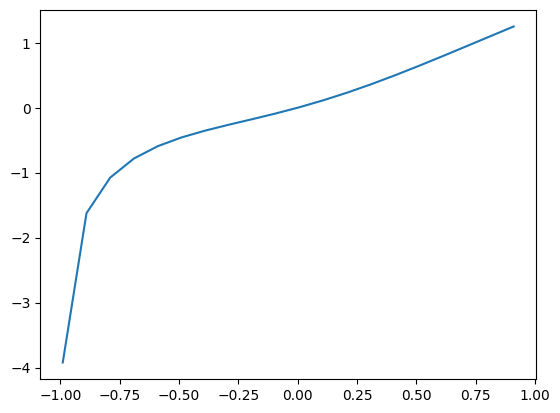

In [9]:
def nguyen_7(x: torch.Tensor):
    return torch.log(x + 1) + torch.log(x ** 2 + 1)


x = torch.arange(-0.99, 1.01, 0.1, dtype=torch.float32).unsqueeze(-1)
y = nguyen_7(x)

plt.plot(x, y)

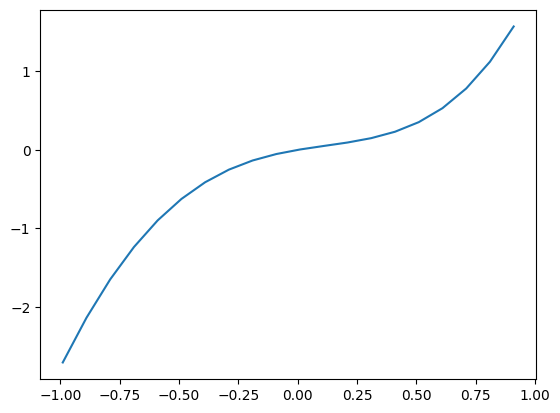

In [10]:
model = MultiLayerModelFactory(x, y, max_size=4, layers=2, min_significance=0.5, log_mode="symmetric").from_class_list(
    [SinBlock, LinearBlock, LnBlock, Pow2Block])
plt.plot(x.numpy(), model(x).detach().numpy())
plt.show()

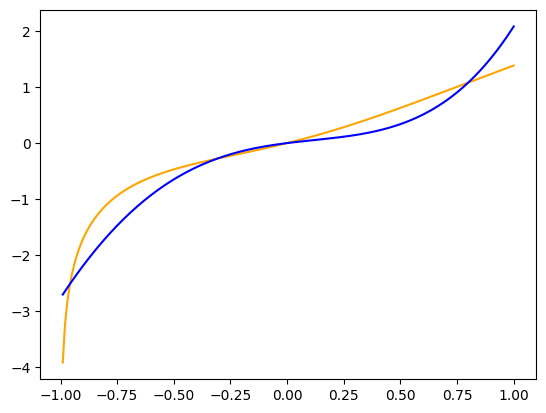

In [11]:
x_test = torch.arange(-0.99, 1.01, 0.01, dtype=torch.float32).unsqueeze(-1)
y_test = nguyen_7(x_test)

plt.plot(x_test, y_test, color="orange")

y_test = model(x_test).detach()
plt.plot(x_test, y_test, color="blue")

In [12]:
print(model)

y = (sin(((x) ^ 2 * -0.1630)) * 3.4341 + (sin(x) * 0.2396 + x * 0.8019 + (x) ^ 2 * -5.7395) * 0.6129 + ((x * 0.7480 + (x) ^ 2 * 0.2860)) ^ 2 * 5.6837) * 0.7965
